Saving usuarios_win_mac_lin (1).csv to usuarios_win_mac_lin (1).csv
   duracion  paginas  acciones  valor  clase
0       7.0        2         4      8      2
1      21.0        2         6      6      2
2      57.0        2         4      4      2
3     101.0        3         6     12      2
4     109.0        2         6     12      2
         duracion     paginas    acciones       valor       clase
count  170.000000  170.000000  170.000000  170.000000  170.000000
mean   111.075729    2.041176    8.723529   32.676471    0.752941
std    202.453200    1.500911    9.136054   44.751993    0.841327
min      1.000000    1.000000    1.000000    1.000000    0.000000
25%     11.000000    1.000000    3.000000    8.000000    0.000000
50%     13.000000    2.000000    6.000000   20.000000    0.000000
75%    108.000000    2.000000   10.000000   36.000000    2.000000
max    898.000000    9.000000   63.000000  378.000000    2.000000
clase
0    86
1    40
2    44
dtype: int64


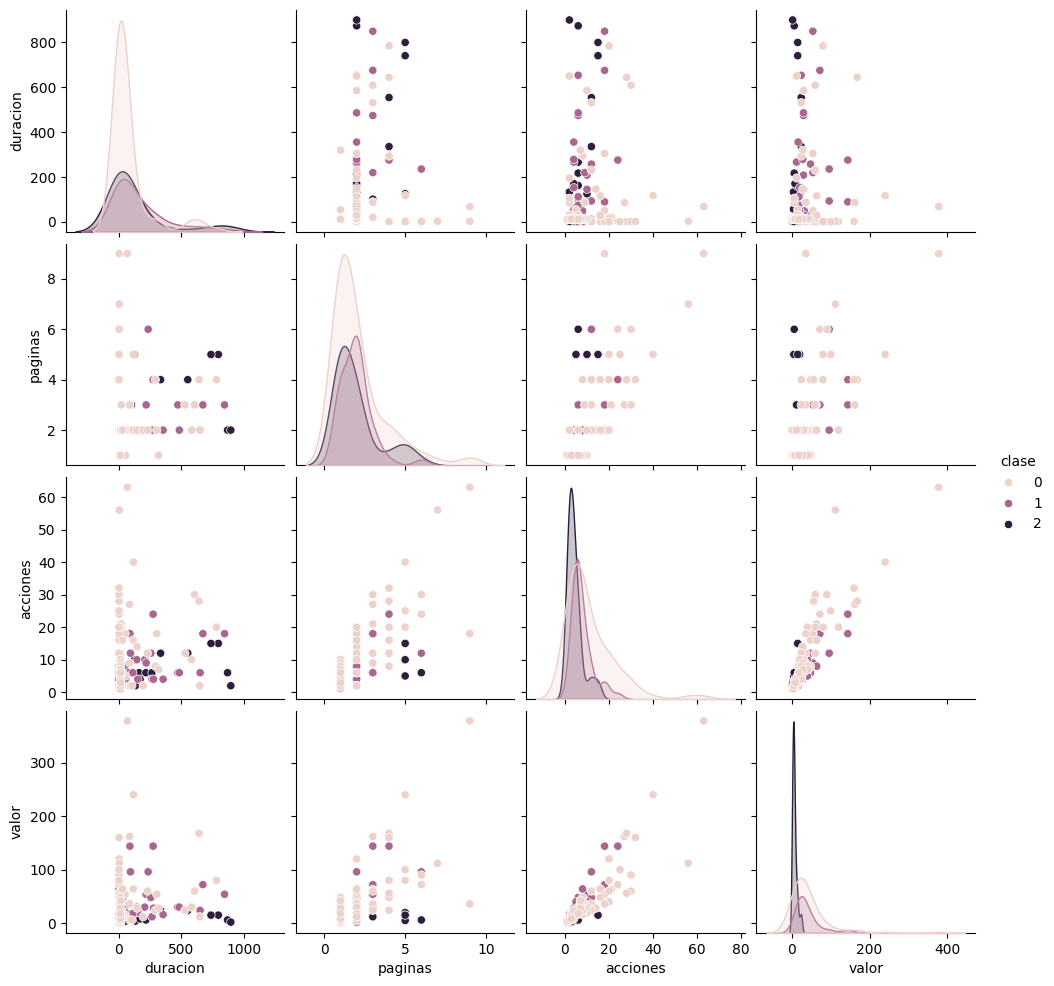

Matriz de confusión:
[[16  0  2]
 [ 3  3  0]
 [ 0  0 10]]

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       1.00      0.50      0.67         6
           2       0.83      1.00      0.91        10

    accuracy                           0.85        34
   macro avg       0.89      0.80      0.81        34
weighted avg       0.87      0.85      0.84        34


Predicción de clase para nuevo usuario con valores [5,2,3,5]: 2


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [2]:
# Ejercicio de clasificación con Regresión Logística

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
import pandas as pd

uploaded = files.upload()
nombre_archivo = list(uploaded.keys())[0]
df = pd.read_csv(nombre_archivo)
df.head()


# 2. Visualización y exploración inicial
print(df.head())
print(df.describe())
print(df.groupby('clase').size())  # Análisis de clases

# 3. Análisis gráfico
sns.pairplot(df.dropna(), hue='clase', vars=['duracion', 'paginas', 'acciones', 'valor'])
plt.show()

# 4. Separar variables (X) y etiqueta (y)
X = df.drop('clase', axis=1).values
y = df['clase'].values

# 5. División entrenamiento (80%) / prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# 6. Crear y entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# 7. Evaluar el modelo con conjunto de prueba
y_pred = model.predict(X_test)
print("Matriz de confusión:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))

# 8. Ejemplo de predicción para un usuario nuevo
X_nuevo = pd.DataFrame({'duracion':[5], 'paginas':[2], 'acciones':[3], 'valor':[5]})
y_pred_nuevo = model.predict(X_nuevo)
print("\nPredicción de clase para nuevo usuario con valores [5,2,3,5]:", y_pred_nuevo[0])
